In [77]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [150]:
X = np.load('../data/ML/rolling_slices.npy')
y = np.load('../data/ML/y_array.npy')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test = X_train/255, X_test/255

In [151]:
# X_train, y_train = X_train[:1000], y_train[:1000]
X_train.shape

(959, 120, 15)

In [152]:
X_train[0]

array([[-0.24279891, -0.08942591,  0.09075524, ..., -2.06258431,
        -3.227629  ,  2.74699347],
       [-0.26413888, -0.11068733, -0.02393511, ..., -1.99232395,
        -3.25999611,  2.42311042],
       [-0.28147761, -0.11635704,  0.01735342, ..., -1.7903232 ,
        -3.5405096 ,  1.7090923 ],
       ...,
       [-0.3508325 , -0.08659106, -0.10345376, ..., -1.57953856,
        -1.16692443,  2.75435247],
       [-0.36216936, -0.09934791, -0.12027501, ..., -1.49171044,
        -1.27481626,  2.76171447],
       [-0.35216625, -0.09084334, -0.18908922, ..., -1.70249507,
        -1.28560237,  2.82796348]])

In [201]:
resnet = tf.keras.applications.ResNet50(input_shape=(120, 120, 3),include_top=False)

In [195]:
X_train[0].shape

(120, 15)

In [204]:
import numpy as np
import tensorflow as tf

# Example array of images
images = np.copy(X_train)  # Replace num_images with your actual number of images


# Add a channel dimension to make it (num_images, 120, 15, 1)
images = images[:, :, :, np.newaxis]

# Resize images to 32x32
# We use 'bilinear' interpolation; you might choose a different method based on your needs
resized_images = tf.image.resize(images, [120,120], method='bilinear').numpy()

# Duplicate the channel to create 3-channel images
three_channel_images = np.repeat(resized_images, 3, axis=3)

# Check the final shape
print(three_channel_images.shape)

(959, 120, 120, 3)


In [ ]:
resnet.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
resnet.fit(three_channel_images, y_train)


In [153]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(120, 15, 1)))
model.add(layers.MaxPooling2D((2, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(4))

In [154]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 118, 13, 64)       640       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 59, 13, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 57, 11, 64)        36928     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 28, 5, 64)         0         
 ng2D)                                                           
                                                                 
 conv2d_40 (Conv2D)          (None, 26, 3, 64)         36928     
                                                                 
 conv2d_41 (Conv2D)          (None, 24, 1, 64)       

In [155]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15, batch_size=64,
                    validation_data=(X_test[:100], y_test[:100]))

Epoch 1/15


15/15 [==============================] - 1s 52ms/step - loss: 1.3655 - accuracy: 0.3180 - val_loss: 1.3405 - val_accuracy: 0.3800
Epoch 2/15
15/15 [==============================] - 1s 50ms/step - loss: 1.3429 - accuracy: 0.3452 - val_loss: 1.3373 - val_accuracy: 0.3400
Epoch 3/15
15/15 [==============================] - 1s 51ms/step - loss: 1.3179 - accuracy: 0.3389 - val_loss: 1.3024 - val_accuracy: 0.3600
Epoch 4/15
15/15 [==============================] - 1s 48ms/step - loss: 1.2643 - accuracy: 0.4181 - val_loss: 1.3999 - val_accuracy: 0.3300
Epoch 5/15
15/15 [==============================] - 1s 47ms/step - loss: 1.2006 - accuracy: 0.4494 - val_loss: 1.1776 - val_accuracy: 0.4400
Epoch 6/15
15/15 [==============================] - 1s 49ms/step - loss: 1.0581 - accuracy: 0.5266 - val_loss: 1.1608 - val_accuracy: 0.5500
Epoch 7/15
15/15 [==============================] - 1s 52ms/step - loss: 0.8690 - accuracy: 0.5902 - val_loss: 1.1422 - val_accuracy: 0.5900
Epoch 8/15
15/15 [======

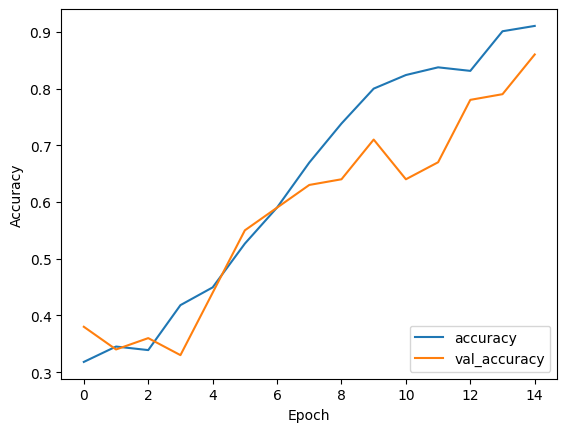

In [164]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')



## Using test data to make sure

In [165]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [166]:
DATA_DIR = "../data/Junction/indoor_test_doing_boing/"

data_afe = []
for file in os.listdir(DATA_DIR):
    if "AFE" in file:
        with open(DATA_DIR + file, "r") as f:
            data_afe += json.loads(f.readlines()[0])
            
data_imu = []
for file in os.listdir(DATA_DIR):
    if "IMU" in file:
        with open(DATA_DIR + file, "r") as f:
            data_imu += json.loads(f.readlines()[0])

len(data_afe), len(data_imu)
df_rows = ["l0", "l1", "l2", "l3", "l4", "l5", "r0", "r1", "r2", "r3", "r4", "r5", "epoch", "tick", "x", "y", "z"]
left_temp = []
right_temp = []
epoch_temp = []
tick_temp = []
x_temp = []
y_temp = []
z_temp = []
counter = 0
for data_row in data_afe:
    if data_row["afe"][0]["t"] == "L":
        #print(data_row["afe"][0]["m"][0][:6])
        left_temp.append(data_row["afe"][0]["m"][0][:6])
        right_temp.append(data_row["afe"][1]["m"][0][:6])
        # assert data_row["afe"][0]["i"][1] 
        tick_temp.append(data_row["afe"][0]["i"][0])
        epoch_temp.append(data_row["afe"][0]["i"][1])
    else:
        right_temp.append(data_row["afe"][0]["m"][0][:6])
        left_temp.append(data_row["afe"][1]["m"][0][:6])
        tick_temp.append(data_row["afe"][0]["i"][0])
        epoch_temp.append(data_row["afe"][0]["i"][1])
    try:
        x_temp.append(data_imu[counter]["v"][0])
        y_temp.append(data_imu[counter]["v"][1])
        z_temp.append(data_imu[counter]["v"][2])
    except:
        pass
    counter += 1

combined = [(left + right + [epoch] + [tick] + [x] + [y] + [z]) for left, right, epoch, tick, x, y, z in zip(left_temp, right_temp, epoch_temp, tick_temp, x_temp, y_temp, z_temp)]

df = pd.DataFrame(combined, columns=df_rows)
df["time"] = pd.to_datetime(df["epoch"], unit="us")

# TODO OLULINE
# eemaldame epochid et visualiseerimine oleks lihtsam
df = df.drop(columns=["epoch", "tick"])
# scaler = MinMaxScaler()
# numpy_scaled = scaler.fit_transform(df.drop(columns=["time"], axis=1))
# df_scaled = pd.DataFrame(numpy_scaled, columns=df.drop(columns=["time"], axis=1).columns)
# df_scaled["time"] = df["time"]
df.head()

,l0,l1,l2,l3,l4,l5,r0,r1,r2,r3,r4,r5,x,y,z,time
0,18616,7594,11583,13213,13838,15303,26438,7947,10521,15255,14661,10720,-0.333426,9.416835,2.883155,2023-11-11 18:56:21.131168
1,18688,7612,11621,13214,13867,15257,26315,7935,10499,15252,14656,10733,-0.421685,9.274639,2.824315,2023-11-11 18:56:21.164555
2,18799,7498,11482,13219,14046,15191,25870,7850,10416,15233,14695,10754,-0.424137,9.257477,2.625730,2023-11-11 18:56:21.298165
3,18633,7470,11403,13198,13885,15204,25651,7873,10408,15179,14851,10762,-0.468267,9.296704,2.733603,2023-11-11 18:56:21.364878
4,18599,7393,11336,13150,13809,15218,25948,7780,10321,15206,15101,10685,-0.333426,9.296704,2.684570,2023-11-11 18:56:21.498488


In [179]:
df = pd.read_csv("../data/Junction/indoor_test_doing_boing/compact.csv")
df.head()

,l0,l1,l2,l3,l4,l5,r0,r1,r2,r3,r4,r5,x,y,z,time
0,16788,5909,9506,15557,15928,17441,21413,6266,8505,14825,14087,8888,0.431492,8.289070,4.876356,210
1,16713,5963,9464,15607,15953,17444,21443,6280,8490,14931,14141,8894,0.456009,8.085582,4.636093,211
2,16663,5965,9517,15609,15919,17462,21465,6250,8500,14988,14197,8899,0.380007,8.382234,4.810161,212
3,16409,6005,9520,15672,15948,17458,21548,6266,8472,14987,14122,8900,0.593302,8.485203,4.854291,213
4,16367,6008,9461,15692,15995,17458,21546,6235,8472,14965,14118,8894,0.603108,8.217972,4.734160,214


In [180]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[['l0', 'l1', 'l2', 'l3', 'l4', 'l5', 'r0', 'r1', 'r2', 'r3', 'r4', 'r5', 'x', 'y', 'z']]),
                             columns=['l0', 'l1', 'l2', 'l3', 'l4', 'l5', 'r0', 'r1', 'r2', 'r3', 'r4', 'r5', 'x', 'y', 'z'])
df_scaled["time"] = df["time"]

# ohe = OneHotEncoder()
# ohe.fit(df[["label"]])

# df_scaled[[cat for cat in ohe.categories_[0]]] = ohe.transform(df[["label"]]).toarray()

# for col in df_scaled.columns:
#     if col not in ["time", "label"]:
#         df_scaled[col] = pd.to_numeric(df_scaled[col]).astype(np.uint8)

df_scaled.head()

,l0,l1,l2,l3,l4,l5,r0,r1,r2,r3,r4,r5,x,y,z,time
0,-0.181575,-0.344080,-0.401105,0.123262,-0.332938,-0.060224,-0.475206,-0.176230,-0.265228,-0.810951,-0.705638,-0.901572,-0.526792,0.126435,0.118827,210
1,-0.213522,-0.306204,-0.427890,0.177675,-0.312806,-0.056866,-0.461845,-0.165853,-0.274659,-0.721143,-0.656615,-0.895156,-0.476306,-0.105639,-0.042548,211
2,-0.234821,-0.304801,-0.394090,0.179852,-0.340185,-0.036716,-0.452047,-0.188089,-0.268372,-0.672850,-0.605775,-0.889809,-0.632813,0.232687,0.074367,212
3,-0.343017,-0.276745,-0.392177,0.248412,-0.316832,-0.041194,-0.415082,-0.176230,-0.285977,-0.673698,-0.673864,-0.888739,-0.193584,0.350122,0.104007,213
4,-0.360907,-0.274641,-0.429804,0.270177,-0.278984,-0.041194,-0.415973,-0.199207,-0.285977,-0.692337,-0.677495,-0.895156,-0.173391,0.045349,0.023320,214


In [181]:
def scale_small_df(df, scaler):
    df_scaled = pd.DataFrame(scaler.fit_transform(df[['l0', 'l1', 'l2', 'l3', 'l4', 'l5', 'r0', 'r1', 'r2', 'r3', 'r4', 'r5', 'x', 'y', 'z']]),
                                columns=['l0', 'l1', 'l2', 'l3', 'l4', 'l5', 'r0', 'r1', 'r2', 'r3', 'r4', 'r5', 'x', 'y', 'z'])

    df_scaled["time"] = df["time"].values

    # for col in df_scaled.columns:
    #     if col not in ["time", "label"]:
    #         df_scaled[col] = pd.to_numeric(df_scaled[col]).astype(np.uint8)

    return df_scaled

def scaled2image(df):
    data_array = df[['l0', 'l1', 'l2', 'l3', 'l4', 'l5', 'r0', 'r1', 'r2', 'r3', 'r4', 'r5', 'x', 'y', 'z']].to_numpy()
    # Create the rolling slices
    window_size = 60*2# Size of each slice
    rolling_slices = np.array([data_array[i:i+window_size] for i in range(0, len(data_array) - window_size + 1) ])
    return rolling_slices


In [182]:
all_rolling_slices = []

for df in [df_scaled]:
    df = scale_small_df(df, scaler)
    rolling_slices = scaled2image(df)
    all_rolling_slices.extend(rolling_slices)

all_rolling_slices = np.array(all_rolling_slices) #/ 255

In [183]:
y_test[0:1]

array([[0., 1., 0., 0.]])

In [184]:
res = model.predict([all_rolling_slices])

169/169 [==============================] - 1s 8ms/step


In [185]:
resmax = np.argmax(res, axis=1)
pd.DataFrame(resmax).value_counts()

1    3074
2    1945
0     223
3     165
Name: count, dtype: int64

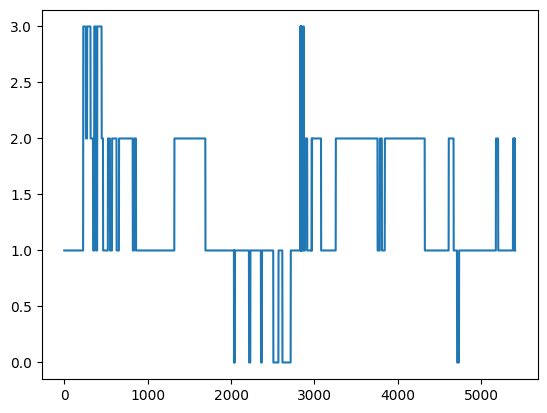

In [186]:
plt.plot(resmax)

In [187]:
pd.DataFrame(y_train).value_counts()

0    1    2    3  
0.0  0.0  0.0  1.0    322
          1.0  0.0    306
     1.0  0.0  0.0    184
1.0  0.0  0.0  0.0    147
Name: count, dtype: int64